# <font color='purple'>Ciência dos Dados na Prática</font>




# <font color='Blue'>Redes Neurais - Previsão de Câncer de Mama (Benigno/Maligno)</font>




In [0]:
from PIL import Image
%matplotlib inline
im = Image.open("RedesNeurais.png")
im.show()
im 

## Multilayer Perceptron (MLP)

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

As Redes Neurais são uma estrutura de aprendizado de máquina que tenta imitar o padrão de aprendizagem de redes neurais biológicas naturais. As redes neurais biológicas têm neurônios interconectados com dendritos que recebem entradas, e com base nessas entradas eles produzem um sinal de saída através de um axônio para outro neurônio. Vamos tentar imitar esse processo através do uso de Redes Neurais Artificiais (RNAs), que apenas nos referiremos como redes neurais a partir de agora. O processo de criação de uma rede neural começa com a forma mais básica, um único perceptron.

Vamos começar nossa discussão falando sobre o Perceptron! Um perceptron tem uma ou mais entradas, um viés (bias), uma função de ativação e uma única saída. O perceptron recebe entradas, multiplica essas entradas por algum peso e passa-as para uma função de ativação para produzir uma saída. Há muitas funções de ativação possíveis tais como a função logística, uma função trigonométrica, uma função de step, etc. Também nos certificamos de adicionar um viés para o perceptron, isso evita problemas onde todas as entradas poderiam ser iguais a zero (significado Nenhum peso multiplicativo teria um efeito). Confira o diagrama abaixo para uma visualização de um perceptron:

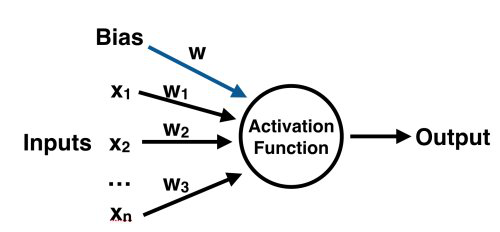

In [11]:
from PIL import Image
%matplotlib inline
im = Image.open("perceptron.jpg")
im.show()
im 

Uma vez que temos a saída podemos compará-lo com um rótulo conhecido e ajustar os pesos de acordo (os pesos normalmente começam com valores de inicialização aleatórios). Continuamos a repetir este processo até termos atingido um número máximo de iterações permitidas ou uma taxa de erro aceitável.

Para criar uma rede neural, simplesmente começamos a adicionar camadas de perceptrons juntos, criando um modelo de perceptron multicamada de uma rede neural. Você terá uma camada de entrada que recebe diretamente suas entradas de atributos e uma camada de saída que criará as saídas resultantes. Quaisquer camadas intermediárias são conhecidas como camadas ocultas porque elas não "veem" diretamente as entradas ou saídas do atributo. O diagrama abaixo demonstra o que é uma rede perceptron multicamada:

In [0]:
from PIL import Image
%matplotlib inline
im = Image.open("mlp.jpg")
im.show()
im 

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
cancer = load_breast_cancer()

In [0]:
cancer.keys()

In [0]:
# Descrição completa do dataset
print(cancer['DESCR'])

In [17]:
cancer['data'].shape

(569, 30)

In [0]:
X = cancer['data']
y = cancer['target']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Pré-Processamento

A rede neural pode ter dificuldade em convergir antes do número máximo de iterações permitidas se os dados não forem normalizados. O Perceptron de várias camadas é sensível ao dimensionamento dos atributos, por isso é altamente recomendável escalar seus dados. Observe que você deve aplicar o mesmo escalonamento ao conjunto de teste para obter resultados significativos. Existem diversos métodos diferentes para a normalização dos dados, vamos usar o built-in StandardScaler para a padronização.

In [20]:
# Padronização
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# Aplicando a padronização aos dados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Treinamento do Modelo

Agora é hora de treinar nosso modelo. O SciKit Learn torna isso incrivelmente fácil, usando objetos estimadores. Neste caso, iremos importar o nosso estimador (o modelo Multi-Layer Perceptron Classifier) da biblioteca neural_network do SciKit-Learn!

In [0]:
from sklearn.neural_network import MLPClassifier

Em seguida, criamos uma instância do modelo, há uma série de parâmetros que você pode escolher para definir e personalizar aqui, vamos definir apenas o hidden_layer_sizes. Para este parâmetro você passa uma tupla que consiste no número de neurônios que você quer em cada camada, onde a entrada n-ésima na tupla representa o número de neurônios na n-ésima camada do modelo MLP. Há muitas maneiras de escolher esses números, mas, por simplicidade, escolheremos três camadas com o mesmo número de neurônios que existem no nosso conjunto de dados:

In [0]:
mlp = MLPClassifier(hidden_layer_sizes = (30,30,30))

Agora que o modelo foi feito podemos ajustar os dados de treinamento para o nosso modelo, lembre-se que esses dados já foram processados e dimensionados:

In [24]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Você pode ver a saída que mostra os valores padrão dos outros parâmetros no modelo. Eu encorajo você a brincar com eles e descobrir quais os efeitos que eles têm em seu modelo! Simbora? Testa outros valores aí...ok?

## Previsões e Avaliação

Agora que temos um modelo, é hora de usá-lo para obter previsões! Podemos fazer isso simplesmente com o método predict () fora de nosso modelo ajustado:

In [0]:
predictions = mlp.predict(X_test)

Agora podemos usar as métricas construídas pelo SciKit-Learn, como um relatório de classificação e uma matriz de confusão, para avaliar o desempenho do nosso modelo:

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[53  1]
 [ 2 87]]


Parece que somente 4 tumores foram clasisficados de forma incorreta, deixando-nos com uma taxa de 98% de precisão. Isso é muito bom considerando as poucas linhas de código que tivemos de escrever! A desvantagem entretanto em usar um modelo Multi-Layer Preceptron é como difícil é interpretar o próprio modelo. Os pesos e vieses não serão facilmente interpretáveis em relação a quais características são importantes para o próprio modelo.

No entanto, se você quiser extrair os pesos e viés (bias) do MLP após o treinamento do seu modelo, você usa seus atributos públicos coefs_ e intercepts_.

In [27]:
len(mlp.coefs_)

4

In [28]:
len(mlp.coefs_[0])

30

In [29]:
len(mlp.intercepts_[0])

30

# FIM


### #**Facebook** - Ciência dos Dados - <a href="http://facebook.com/cienciadosdadosbr">facebook.com/cienciadosdadosbr</a>

### #**Telegram** - Scripts e Datasets - Comunidade Telegram <a href="https://t.me/cienciadosdados">https://t.me/cienciadosdados</a>

### #**YouTube** - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [30]:
from IPython.core.display import HTML
HTML('<iframe width="300" height="200" src="https://www.youtube.com/embed/okAOIlqSfUg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')